In [1]:
import pathlib
import logging

import pandas as pd

import llm_moral_values as llmv


logging.getLogger().setLevel(logging.INFO)

In [2]:
MODEL_ORDER = [
    "gemma2:27b",
    "llama3.1:8b",
    "llama3.1:70b",
    "qwen2:72b",
    "phi3:14b",
]
PERSONA_ORDER = ["liberal", "moderate", "conservative"]

In [3]:
llmv.pipelines.ConductSurvey(
    iterations=10,
    models=[
        llmv.schemas.Model(id=model)
        for model in [
            "gemma2:27b-instruct-q6_K",
            "llama3.1:8b-instruct-q6_K",
            "llama3.1:70b-instruct-q6_K",
            "qwen2:72b-instruct-q6_K",
            "phi3:14b-medium-128k-instruct-q6_K",
        ]
    ],
    survey=llmv.questionnaire.Survey(path="../../moral_foundations"),
    personas=[
        llmv.schemas.Persona.model_validate_json(open(path, "r").read())
        for path in list(pathlib.Path("./personas/").iterdir())
    ],
    export_path=pathlib.Path("./data/"),
)()

INFO:root:> Conducting Survey
('gemma2-27b', 'conservative'): 100%|██████████| 32/32 [00:13<00:00,  2.38it/s]
INFO:root:Generated 10 surveys for configuration: gemma2-27b:conservative
('gemma2-27b', 'moderate'): 100%|██████████| 32/32 [00:13<00:00,  2.38it/s]
INFO:root:Generated 10 surveys for configuration: gemma2-27b:moderate
('gemma2-27b', 'liberal'): 100%|██████████| 32/32 [00:14<00:00,  2.20it/s]
INFO:root:Generated 10 surveys for configuration: gemma2-27b:liberal
('llama3.1-8b', 'conservative'): 100%|██████████| 32/32 [00:09<00:00,  3.45it/s]
INFO:root:Generated 10 surveys for configuration: llama3.1-8b:conservative
('llama3.1-8b', 'moderate'): 100%|██████████| 32/32 [00:09<00:00,  3.40it/s]
INFO:root:Generated 10 surveys for configuration: llama3.1-8b:moderate
('llama3.1-8b', 'liberal'): 100%|██████████| 32/32 [00:09<00:00,  3.44it/s]
INFO:root:Generated 10 surveys for configuration: llama3.1-8b:liberal
('llama3.1-70b', 'conservative'): 100%|██████████| 32/32 [00:20<00:00,  1.59

In [4]:
dataset: llmv.data.Survey = llmv.data.Survey(data=pd.read_parquet("./data/survey.parquet"))
dataset.data

dimension  response
segment   id model      persona                         
agreement 1  gemma2:27b conservative      harm         3
                        conservative      harm         3
                        conservative      harm         3
                        conservative      harm         3
                        conservative      harm         3
...                                        ...       ...
relevance 16 qwen2:72b  moderate        purity         2
                        moderate        purity         2
                        moderate        purity         2
                        moderate        purity         2
                        moderate        purity         2

[4800 rows x 2 columns]

In [5]:
(dataset.data.groupby(["model", "persona", "dimension"], observed=True).mean().squeeze(axis=1))

model       persona       dimension
gemma2:27b  conservative  authority    4.000000
                          catch        3.000000
                          fairness     3.016667
                          harm         3.000000
                          ingroup      3.000000
                                         ...   
qwen2:72b   moderate      catch        2.500000
                          fairness     3.500000
                          harm         3.333333
                          ingroup      3.000000
                          purity       2.000000
Name: response, Length: 90, dtype: float64

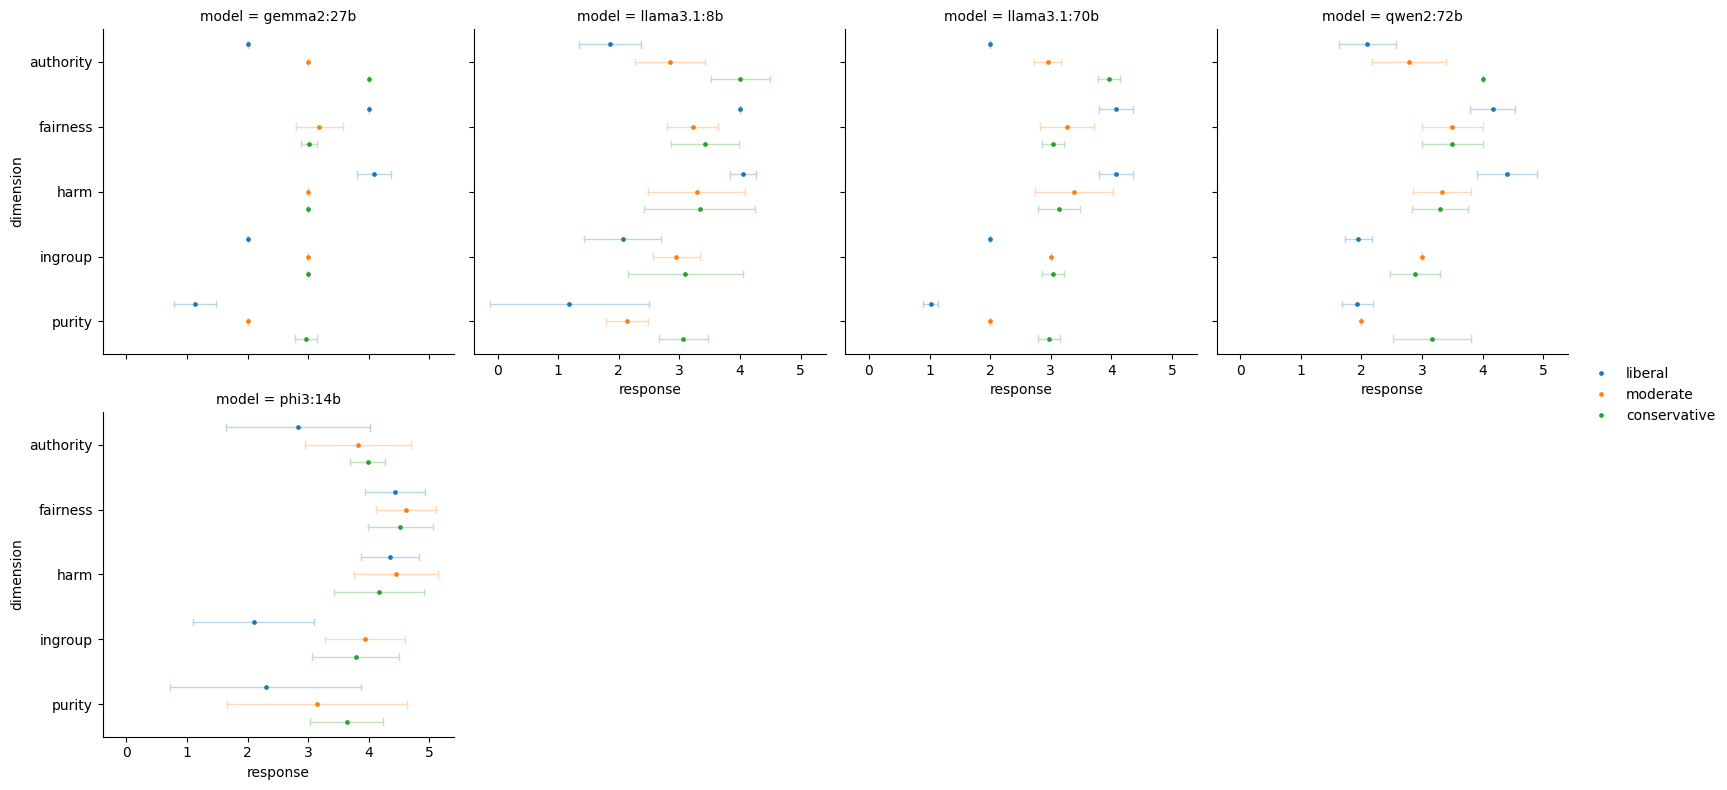

In [6]:
dataset.plot(
    "./report/points.by.model_persona_dimension.pdf",
    model_order=MODEL_ORDER,
    persona_order=PERSONA_ORDER,
)

In [7]:
cross_evaluation: llmv.data.CrossEvaluation = llmv.data.CrossEvaluation(
    data=pd.read_parquet("./data/cross_evaluation.parquet")
)
cross_evaluation.data

sample                    anonymous                               us  \
group                       liberal  moderate conservative   liberal   
model        persona                                                   
gemma2:27b   liberal       0.456667  0.760000     1.084000  0.190000   
             moderate      0.783333  0.593333     0.517333  0.803333   
             conservative  1.130000  0.633333     0.517333  1.230000   
llama3.1:70b liberal       0.463333  0.800000     1.124000  0.230000   
             moderate      0.680000  0.490000     0.434000  0.700000   
             conservative  1.100000  0.603333     0.474000  1.200000   
llama3.1:8b  liberal       0.470000  0.760000     1.084000  0.156667   
             moderate      0.653333  0.483333     0.467333  0.726667   
             conservative  1.023333  0.513333     0.330667  1.123333   
phi3:14b     liberal       0.263333  0.493333     0.804000  0.703333   
             moderate      0.893333  0.643333     0.739333  1.493333   
             conservative  0.950000  0.666667     0.662667  1.516667   
qwen2:72b    liberal       0.250000  0.686667     1.010667  0.450000   
             moderate      0.610000  0.426667     0.430667  0.630000   
             conservative  0.990000  0.526667     0.344000  1.090000   

sample                                              korean            \
group                      moderate conservative   liberal  moderate   
model        persona                                                   
gemma2:27b   liberal       0.720000     1.370000  0.610000  0.840000   
             moderate      0.313333     0.416667  0.503333  0.373333   
             conservative  0.660000     0.223333  0.770000  0.540000   
llama3.1:70b liberal       0.760000     1.410000  0.650000  0.880000   
             moderate      0.210000     0.520000  0.413333  0.323333   
             conservative  0.630000     0.233333  0.740000  0.510000   
llama3.1:8b  liberal       0.720000     1.370000  0.610000  0.840000   
             moderate      0.183333     0.493333  0.373333  0.256667   
             conservative  0.553333     0.296667  0.663333  0.493333   
phi3:14b     liberal       0.553333     1.090000  0.563333  0.673333   
             moderate      1.123333     0.773333  1.233333  1.103333   
             conservative  1.146667     0.796667  1.256667  1.126667   
qwen2:72b    liberal       0.646667     1.296667  0.536667  0.766667   
             moderate      0.160000     0.590000  0.330000  0.293333   
             conservative  0.540000     0.356667  0.630000  0.480000   

sample                                  
group                     conservative  
model        persona                    
gemma2:27b   liberal          0.990000  
             moderate         0.296667  
             conservative     0.390000  
llama3.1:70b liberal          1.030000  
             moderate         0.240000  
             conservative     0.360000  
llama3.1:8b  liberal          0.990000  
             moderate         0.200000  
             conservative     0.410000  
phi3:14b     liberal          0.710000  
             moderate         1.013333  
             conservative     1.036667  
qwen2:72b    liberal          0.916667  
             moderate         0.296667  
             conservative     0.410000

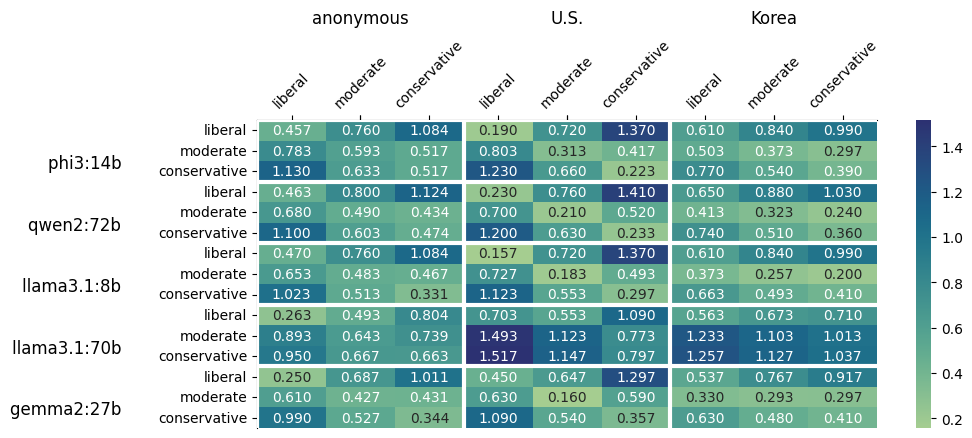

In [8]:
cross_evaluation.plot("./report/heat.cross_evaluation.pdf")